# CNN 

In [2]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

#normalize pixel values to be inbetween 0 & 1.
train_images,test_images = train_images/255.0,test_images/255.0
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


model = keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))


print(model.summary())

model.compile(optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

history = model.fit(train_images,train_labels,epochs = 50,validation_data=(test_images,test_labels))  #25 epochs would be better
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val-accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')


test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy: ',test_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

KeyError: 'val-accuracy'

In [3]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


313/313 - 2s - loss: 1.5257 - accuracy: 0.6784

Test accuracy:  0.6783999800682068


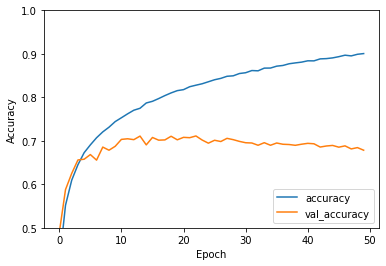

In [4]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')


test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy: ',test_acc)